# Movies 3

## Introduction

Une base de données (hébergée dans le cloud AWS) contenant un certain nombre de données cinématographiques vous est fournie pour exploration et mise en pratique des langages SQL et Python.  
Les données de connexion (user, host) sont indiquées dans le brief, le mot de passe nécessaire est précisé en session par le formateur.  


## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

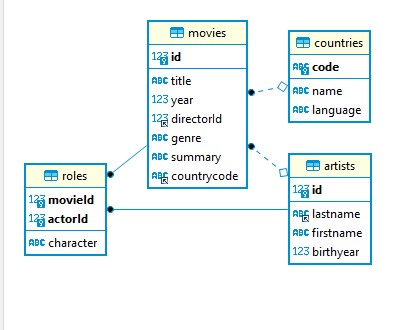

In [1]:
from IPython.display import Image
Image("Snaps/01.jpg")

En inspectant le diagramme, il apparait dans un premier temps que la base de données est composée de 4 tables. Les différents relations entre celles-ci se composent de cette façon :

* La table *"movies"*, qui compte le plus de relation et une primary key : *"id"*, est reliée aux trois autres (*"id"* et *"movieId"* de la table *"roles"* en primary key, *"countrycode"* et *"code"* de la table *"countries"* cette fois-ci en tant que foreign key, et enfin *"director"* et *"id"* de la table *"artists"* également en foreign key)

* La table *"roles"* qui compte deux primary key que sont *"movieId"* (reliée à *"id"* de la table *"movies"* en tant que primary key) et *"actorId"* (reliée à *"id"* de la table *"artists"* en primary key)

* La table *"coutries"* et sa primary key *"code"* reliée par une foreign key à *"countrycode"* de la table *"movies"* 

* Enfin la table *"artists"* qui compte aussi une primary key, *"id"*, mais deux liens (*"id"* reliée à *"directorId"* de la table *"movies"* par une foreign key, mais également à *"actorId"* de la table *"roles"* par une primary key

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [2]:
import os
import pandas as pd

In [3]:
from sqlalchemy import create_engine
import pymysql

In [4]:
# paramètres de connexion à la base de données movies (MySQL sous AWS RDS)
user = os.environ.get('movies3_user')
password = os.environ.get('movies3_psw')
host = os.environ.get('movies3_host')
port = 3306
dbname = 'movies'  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")

### Exemples

#### Tables de base

In [5]:
movies = pd.read_sql_query("SELECT * FROM movies LIMIT 10", engine)
movies.head()

,id,title,year,directorId,genre,summary,countrycode
0,11,La Guerre des étoiles,1977,1,Aventure,"Il y a bien longtemps, dans une galaxie très l...",US
1,24,Kill Bill : Volume 1,2003,138,Action,Au cours d'une cérémonie de mariage en plein d...,US
2,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
3,33,Impitoyable,1992,190,Western,"Après avoir été un impitoyable tueur, toujours...",US
4,38,Eternal Sunshine of the Spotless Mind,2004,201,Science-Fiction,Joël et Clémentine ne voient plus que les mauv...,US


In [6]:
artists = pd.read_sql_query("SELECT * FROM artists LIMIT 10", engine)
artists.head()

,id,lastname,firstname,birthyear
0,1,Lucas,George,1944
1,2,Hamill,Mark,1951
2,3,Ford,Harrison,1942
3,4,Fisher,Carrie,1956
4,5,Cushing,Peter,1913


In [7]:
roles = pd.read_sql_query("SELECT * FROM roles LIMIT 10", engine)
roles.head()

,movieId,actorId,character
0,11,2,Luke Skywalker
1,1891,2,Luke Skywalker
2,1892,2,Luke Skywalker
3,181808,2,Luke Skywalker / Dobbu Scay (voice)
4,11,3,Han Solo


In [8]:
countries = pd.read_sql_query("SELECT * FROM countries LIMIT 10", engine)
countries.head()

,code,name,language
0,AU,Australia,
1,BE,Belgium,
2,BS,Bahamas,
3,CA,Canada,
4,CN,China,


#### Autre requête simple
Q00: Nom et année de naissance des artistes nés après 1975 ? Combien sont-ils ?

In [9]:
sql_query_00 = """
    SELECT *
    FROM artists
    WHERE birthyear > 1975
"""

results = pd.read_sql_query(sql_query_00, engine)
results.head(5)

,id,lastname,firstname,birthyear
0,131,Gyllenhaal,Jake,1980
1,205,Dunst,Kirsten,1982
2,225,Holmes,Ashton,1978
3,258,García Bernal,Gael,1978
4,368,Witherspoon,Reese,1976


In [10]:
results.shape

(118, 4)

In [11]:
len(results)

118

### Questions

#### *Les questions à l'intitulé en gras ne sont pas résolues*

Q01: Quels sont les films de type 'Drame' ? Combien cela représente de films ?  

In [12]:
sql_query_01 = """
    SELECT id, title, year, genre
    FROM movies
    WHERE genre = "Drame"
"""

results1 = pd.read_sql_query(sql_query_01, engine)
results1.head(5)

,id,title,year,genre
0,28,Apocalypse Now,1979,Drame
1,59,A History of Violence,2005,Drame
2,116,Match point,2005,Drame
3,142,Le Secret de Brokeback Mountain,2005,Drame
4,145,Breaking the Waves,1996,Drame


In [13]:
len(results1)

83

Q02: Quels rôles a joué Bruce Willis et dans quels films (triés par ordre chronologique) ?

In [14]:
sql_query_02 = """
    SELECT movies.year, movies.title, roles.character
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.Id
    INNER JOIN movies ON roles.movieId=movies.Id
    WHERE lastname = "Willis" AND firstname = "Bruce"
    ORDER BY movies.year ASC
"""

results2 = pd.read_sql_query(sql_query_02, engine)
results2.head(5)

,year,title,character
0,1988,Piège de cristal,John McClane
1,1990,58 minutes pour vivre,John McClane
2,1994,Pulp Fiction,Butch Coolidge
3,1995,Une Journée en enfer,John McClane
4,2007,Die Hard 4 : Retour en enfer,John McClane


In [15]:
len(results2)

5

Q03: Qui est le réalisateur de Memento ?

In [16]:
sql_query_03 = """
    SELECT movies.title, movies.year, movies.directorId, artists.lastname,  artists.firstname
    FROM movies INNER JOIN artists on movies.directorId=artists.id
    WHERE title = "Memento"
"""

results3 = pd.read_sql_query(sql_query_03, engine)
results3.head(5)

,title,year,directorId,lastname,firstname
0,Memento,2000,525,Nolan,Christopher


Q04: Qui a joué le rôle de Chewbacca et dans quels films ?

In [17]:
sql_query_04 = """
    SELECT *
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.Id
    INNER JOIN movies ON roles.movieId=movies.Id
    WHERE roles.character = "Chewbacca"
"""

results4 = pd.read_sql_query(sql_query_04, engine)
results4.head(5)

,movieId,actorId,character,id,lastname,firstname,birthyear,id,title,year,directorId,genre,summary,countrycode
0,11,24343,Chewbacca,24343,Mayhew,Peter,1944,11,La Guerre des étoiles,1977,1,Aventure,"Il y a bien longtemps, dans une galaxie très l...",US
1,1891,24343,Chewbacca,24343,Mayhew,Peter,1944,1891,L'Empire contre-attaque,1980,10930,Aventure,"Malgré la destruction de l’Étoile Noire, l'Emp...",US
2,1892,24343,Chewbacca,24343,Mayhew,Peter,1944,1892,Le Retour du Jedi,1983,19800,Aventure,L'Empire galactique est plus puissant que jama...,US
3,140607,24343,Chewbacca,24343,Mayhew,Peter,1944,140607,Star Wars : Le Réveil de la Force,2015,15344,Action,"Il y a bien longtemps, dans une galaxie lointa...",US
4,181808,1709041,Chewbacca,1709041,Suotamo,Joonas,1986,181808,Star Wars : Les Derniers Jedi,2017,67367,Fantastique,Nouvel épisode de la saga. Les héros du Révei...,US


Q05: Dans quels films Bruce Willis a-t-il joué le role de John McClane ? 

In [18]:
sql_query_05 = """
    SELECT movies.title, movies.year
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.Id
    INNER JOIN movies ON roles.movieId=movies.Id
    WHERE roles.character = "John McClane"
    ORDER BY movies.year ASC
"""

results5 = pd.read_sql_query(sql_query_05, engine)
results5.head(5)

,title,year
0,Piège de cristal,1988
1,58 minutes pour vivre,1990
2,Une Journée en enfer,1995
3,Die Hard 4 : Retour en enfer,2007


Q06: Quels sont les acteurs de 'Sueurs froides' ?

In [19]:
sql_query_06 = """
    SELECT artists.lastname, artists.firstname
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.Id
    INNER JOIN movies ON roles.movieId=movies.Id
    WHERE movies.title = "Sueurs Froides"
"""

results6 = pd.read_sql_query(sql_query_06, engine)
results6.head(5)

,lastname,firstname
0,Stewart,James
1,Novak,Kim
2,Bel Geddes,Barbara


Q07: Quels sont les films dont le réalisateur est Tim Burton, et l’un des acteurs Johnny Depp ?

In [20]:
sql_query_07 = """
    SELECT title AS Titre
    FROM (
        SELECT artists.id AS Artiste, title, movies.id AS Idfilm
        FROM artists
        INNER JOIN movies ON artists.id = movies.directorId
        WHERE lastname = "Burton"
    ) AS filmburton
    INNER JOIN roles ON filmburton.Idfilm = roles.movieId 
    INNER JOIN artists ON roles.actorId = artists.id
    WHERE lastname = "Depp"
"""

results7 = pd.read_sql_query(sql_query_07, engine)
results7.head(5)

,Titre
0,"Sleepy Hollow, La Légende du cavalier sans tête"


Q08: Quels sont les films dans lesquels a joué Woody Allen ? Donnez aussi le rôle.

In [21]:
sql_query_08 = """
    SELECT movies.title, roles.character
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.Id
    INNER JOIN movies ON roles.movieId=movies.Id
    WHERE roles.actorId = movies.directorid and artists.lastname = "Allen"
"""

results8 = pd.read_sql_query(sql_query_08, engine)
results8.head(5)

,title,character
0,Scoop,Sid Waterman
1,Manhattan,Isaac Davis
2,Annie Hall,Alvy Singer
3,Maris et femmes,Prof. Gabriel 'Gabe' Roth


Q09: Quel metteur en scène a tourné dans ses propres films ? Donnez le nom, le rôle et le titre des films en question.

In [22]:
sql_query_09 = """
    SELECT movies.title, artists.firstname, artists.lastname, roles.character
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.Id
    INNER JOIN movies ON roles.movieId=movies.Id
    WHERE roles.actorId = movies.directorid
"""

results9 = pd.read_sql_query(sql_query_09, engine)
results9.head(5)

,title,firstname,lastname,character
0,Impitoyable,Clint,Eastwood,Bill Munny
1,Reservoir Dogs,Quentin,Tarantino,Mr. Brown
2,Scoop,Woody,Allen,Sid Waterman
3,Pulp Fiction,Quentin,Tarantino,Jimmie Dimmick
4,Manhattan,Woody,Allen,Isaac Davis


Q10: Quels sont les films de Quentin Tarantino dans lesquels il n’a pas joué

In [23]:
sql_query_10 = """
    SELECT title
    FROM movies
    INNER JOIN artists ON movies.directorId=artists.Id
    WHERE artists.lastname = "Tarantino"
    AND directorId NOT IN (
        SELECT actorId
        FROM roles
        WHERE movies.id=roles.movieId
    )
"""

results10 = pd.read_sql_query(sql_query_10, engine)
results10.head(10)

,title
0,Kill Bill : Volume 1
1,Jackie Brown
2,Kill Bill : Volume 2
3,Inglourious Basterds
4,Django Unchained


### **Q11: Quel metteur en scène a tourné en tant qu’acteur ? Donner le nom, le rôle et le titre des films dans lesquels cet artiste a joué.**

In [24]:
sql_query_11 = """
    SELECT artists.lastname, artists.firstname, count(roles.actorId)
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.Id
    INNER JOIN movies ON roles.movieId=movies.Id
    WHERE roles.actorId=movies.directorId
    GROUP BY roles.actorId
    ORDER BY count(artists.lastname) DESC
"""

results11 = pd.read_sql_query(sql_query_11, engine)
results11.head(5)

,lastname,firstname,count(roles.actorId)
0,Allen,Woody,4
1,Chaplin,Charlie,4
2,Tarantino,Quentin,2
3,Welles,Orson,1
4,Eastwood,Clint,1


### **Q12: Quels sont les films de Hitchcock sans James Stewart**

In [25]:
sql_query_12 = """
    SELECT movies.title, movies.year, movies.directorId, artists.lastname, artists.firstname
    FROM artists
    INNER JOIN movies ON artists.id=movies.directorId
    INNER JOIN roles ON artists.id=roles.actorId
    WHERE artists.lastname = "Hitchcock"
    AND artists.lastname NOT IN (
        SELECT artists.lastname
        FROM artists
        WHERE artists.lastname = "Stewart"
    )
"""

results12 = pd.read_sql_query(sql_query_12, engine)
results12.head(5)

,title,year,directorId,lastname,firstname


Q13: Quel est la filmographie de James Stewart ?

In [26]:
sql_query_13 = """
    SELECT movies.title, movies.year, roles.actorId
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.Id
    INNER JOIN movies ON roles.movieId=movies.Id
    WHERE artists.lastname = "Stewart" AND artists.firstname = 'James'
    ORDER BY movies.year ASC
"""

results13 = pd.read_sql_query(sql_query_13, engine)
results13.head(5)

,title,year,actorId
0,Fenêtre sur cour,1954,854
1,L'homme qui en savait trop,1956,854
2,Sueurs froides,1958,854


Q14: Quels sont les films sans rôle (acteurs) ?

In [27]:
sql_query_14 = """
    SELECT *
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.Id
    INNER JOIN movies ON roles.movieId=movies.Id
    WHERE roles.character IS NULL
"""

results14 = pd.read_sql_query(sql_query_14, engine)
results14.head(5)

,movieId,actorId,character,id,lastname,firstname,birthyear,id,title,year,directorId,genre,summary,countrycode


### **Q15: Combien d'acteurs n’ont jamais réalisé de film ?**

In [28]:
sql_query_15 = """
    SELECT count(roles.actorId)
    FROM artists
    INNER JOIN movies ON artists.id=movies.directorid
    INNER JOIN roles ON artists.id=roles.actorId
    WHERE movies.directorId != roles.actorId
"""

results15 = pd.read_sql_query(sql_query_15, engine)
results15.head(10)

,count(roles.actorId)
0,0


Q16: Donnez les noms et prénoms des 10 réalisateurs les plus prolifiques, ainsi que le nombre de films qu’ils ont tournés ?

In [29]:
sql_query_16 = """
    SELECT artists.lastname, artists.firstname, count(movies.directorId) as d_count
    FROM artists
    INNER JOIN movies ON artists.id=movies.directorid
    GROUP BY movies.directorId
    ORDER BY d_count DESC
"""

results16 = pd.read_sql_query(sql_query_16, engine)
results16.head(10)

,lastname,firstname,d_count
0,Spielberg,Steven,13
1,Hitchcock,Alfred,10
2,Allen,Woody,8
3,Tarantino,Quentin,7
4,Kubrick,Stanley,7
5,Nolan,Christopher,6
6,Scott,Ridley,6
7,Ford Coppola,Francis,6
8,Polanski,Roman,6
9,Lucas,George,5


Q17: Donnez les noms et prénoms des réalisateurs qui ont tourné au moins deux films. Combien sont-ils ?

In [30]:
sql_query_17 = """
    SELECT artists.lastname, artists.firstname, count(roles.actorId)
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.Id
    INNER JOIN movies ON roles.movieId=movies.Id
    WHERE roles.actorId=movies.directorId
    GROUP BY roles.actorId
    ORDER BY count(artists.lastname) DESC
"""

results17 = pd.read_sql_query(sql_query_17, engine)
results17.head(5)

,lastname,firstname,count(roles.actorId)
0,Allen,Woody,4
1,Chaplin,Charlie,4
2,Tarantino,Quentin,2
3,Welles,Orson,1
4,Eastwood,Clint,1


Q18: Dans quels films le réalisateur a-t-il le même prénom que l’un des interprètes ? (titre, nom du réalisateur, nom de l’interprète). Le réalisateur et l’interprète ne doivent pas être la même personne.

In [31]:
sql_query_18 = """
    SELECT m.title, a1.firstname as p_act, a1.lastname as n_act, a2.lastname as n_real, a2.firstname as p_real
    FROM roles r 
    INNER JOIN artists a1 on r.actorId =a1.id 
    INNER JOIN movies m on r.movieId = m.id 
    INNER JOIN artists a2 on m.directorId=a2.id
    WHERE a2.firstname =a1.firstname and  r.actorId!=a2.id
"""

results18 = pd.read_sql_query(sql_query_18, engine)
results18.head(5)

,title,p_act,n_act,n_real,p_real
0,Volte/Face,John,Travolta,Woo,John
1,La Grande Illusion,Jean,Gabin,Renoir,Jean
2,Les demoiselles de Rochefort,Jacques,Perrin,Demy,Jacques
3,Les demoiselles de Rochefort,Jacques,Riberolles,Demy,Jacques
4,Broken Arrow,John,Travolta,Woo,John


Q19: Quels sont les 10 pays produisant le plus de films ?

In [32]:
sql_query_19 = """
    SELECT countries.code, count(countries.code) as c_code
    FROM countries
    INNER JOIN movies ON countries.code=movies.countrycode
    GROUP BY countries.code
    ORDER BY c_code DESC
"""

results19 = pd.read_sql_query(sql_query_19, engine)
results19.head(10)

,code,c_code
0,US,131
1,FR,39
2,GB,21
3,CA,6
4,DE,5
5,IT,5
6,JP,4
7,AU,3
8,SE,3
9,BE,2


Q20: Quels sont les 5 acteurs ayant le plus joué dans des films français ?

In [33]:
sql_query_20 = """
    SELECT artists.lastname, artists.firstname, count(artists.id) AS c_act
    FROM roles
    INNER JOIN artists ON roles.actorId=artists.id
    INNER JOIN movies ON roles.movieId=movies.id
    WHERE movies.countrycode = 'FR'
    GROUP BY artists.Id
    ORDER BY c_act DESC
"""

results20 = pd.read_sql_query(sql_query_20, engine)
results20.head(5)

,lastname,firstname,c_act
0,Piccoli,Michel,3
1,Belmondo,Jean-Paul,3
2,Deneuve,Catherine,3
3,Fresnay,Pierre,2
4,Arestrup,Niels,2


---

## 3. Expression libre

A vous de jouer ! Tentez quelques requêtes de votre choix (avec pourquoi pas quelques graphiques illustratifs en utilisant Matplotlib...)